# Croston's method for forecasting intermittent demand

Use case: when a time series has many zero values.<br>
This is challenging for ARIMA-type models to deal<br>
with.

References:<br>
- [sktime docs](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.croston.Croston.html#sktime.forecasting.croston.Croston)  # noqa<br>
- [Blog post](https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f)  # noqa<br>
- [Hyndman & Athanasopoulos, "Forecasting: Principles and Practice](https://otexts.com/fpp2/counts.html)  # noqa

Crostonâ€™s method will predict a constant value for<br>
all future times, so Crostonâ€™s method essentially<br>
provides another notion for the average value of a time series.

The method is (equivalent to) the following:<br>
- Let v_0 to v_n be the non-zero values of the time series<br>
- Let v be the exponentially smoothed average of v_0 to v_n<br>
- Let z_0 to z_n be the number of consecutive zeros plus 1 between the<br>
in the original time series.<br>
- Let z be the exponentially smoothed average of z_0 to z_n

Then the forecast at a particular time is: v/z

In [1]:
from sktime.forecasting.croston import Croston
from sktime.datasets import load_PBS_dataset
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = 'all'

## Example 1: PBS dataset

In [3]:
y = load_PBS_dataset()
y.tail()

Period
2008-02    0.0
2008-03    0.0
2008-04    0.0
2008-05    0.0
2008-06    0.0
Freq: M, Name: Number of scripts, dtype: float64

In [4]:
forecaster = Croston(smoothing=0.1)
forecaster.fit(y)
y_pred = forecaster.predict(fh=[x for x in range(1, 11)])
y_pred.head()

Croston()

2008-07    0.868892
2008-08    0.868892
2008-09    0.868892
2008-10    0.868892
2008-11    0.868892
Freq: M, dtype: float64

Text(0.5, 1.0, "Example 1 of forecast using Croston's method")

c:\Nayef\time-series-notes\.venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


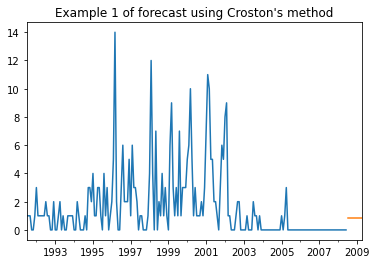

In [5]:
fig, ax = plt.subplots()
y.plot(ax=ax)
y_pred.plot(ax=ax)
ax.set_title("Example 1 of forecast using Croston's method")
fig.show()

## Example 2

In [6]:
y = pd.Series([0]*30 + [2, 2, 0, 0, 0], name='series1')

Croston(smoothing=10)

35   -0.007435
36   -0.007435
37   -0.007435
38   -0.007435
39   -0.007435
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 10")

Croston(smoothing=1.5)

35   -0.142857
36   -0.142857
37   -0.142857
38   -0.142857
39   -0.142857
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 1.5")

Croston(smoothing=1)

35    2.0
36    2.0
37    2.0
38    2.0
39    2.0
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 1")

Croston(smoothing=0.5)

35    0.125
36    0.125
37    0.125
38    0.125
39    0.125
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 0.5")

Croston()

35    0.071429
36    0.071429
37    0.071429
38    0.071429
39    0.071429
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 0.1")

Croston(smoothing=0.01)

35    0.065147
36    0.065147
37    0.065147
38    0.065147
39    0.065147
dtype: float64

Text(0.5, 1.0, "Example 2 of forecast using Croston's method \nAlpha = 0.01")

c:\Nayef\time-series-notes\.venv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


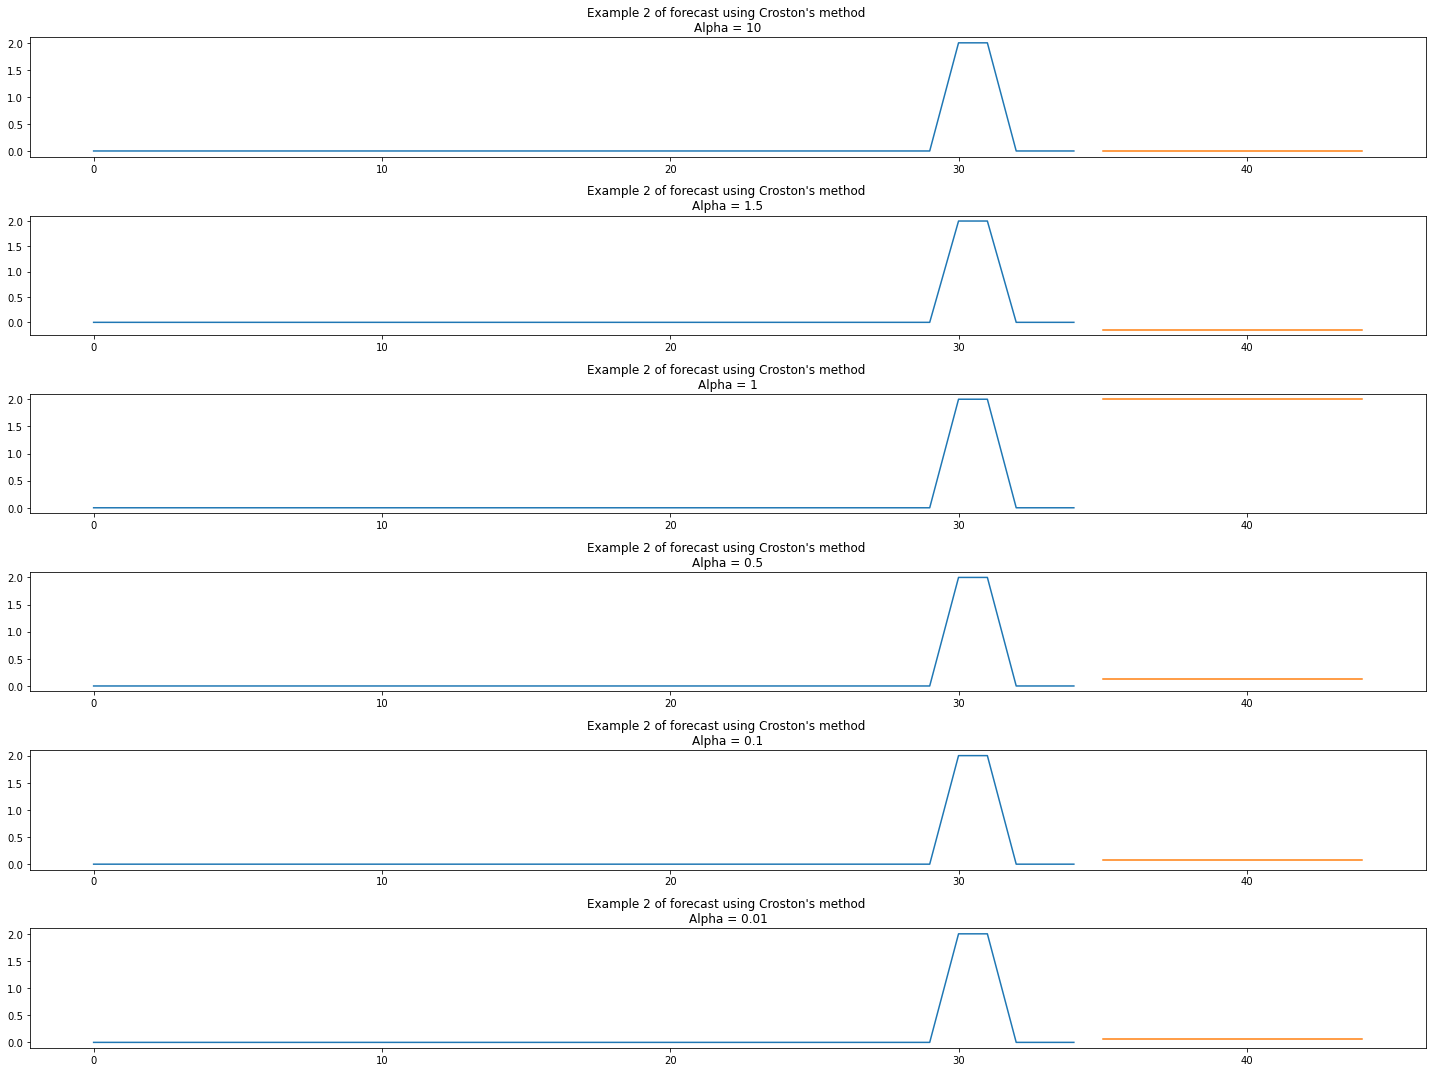

In [7]:
fig = plt.figure(figsize=(20,15))
for n, smooth_value in enumerate([10, 1.5, 1, .5, .1, .01]):
    forecaster = Croston(smoothing=smooth_value)
    forecaster.fit(y)
    y_pred = forecaster.predict(fh=[x for x in range(1, 11)])
    y_pred.head()
    ax = plt.subplot(6, 1, n+1)
    y.plot(ax=ax)
    y_pred.plot(ax=ax)
    ax.set_title(f"Example 2 of forecast using Croston's method \nAlpha = {smooth_value}")
    # ax.set_ylim(0, 10)
fig.tight_layout()
fig.show()
# fig.savefig('alpha-values.pdf')